In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams['figure.figsize']=[15,7]
import warnings
warnings.filterwarnings('ignore')

In [98]:
#Import the train and test
train=pd.read_csv("~/Downloads/titanic_train.csv")
test=pd.read_csv("~/Downloads/titanic_test.csv")

In [99]:
#concatenate the data...
combined=pd.concat([train,test],ignore_index=False,sort=False)

In [100]:
train.shape,test.shape,combined.shape

((891, 12), (418, 11), (1309, 12))

In [101]:
combined

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [102]:
#Check the Missing Values

combined.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

# Univariate Analysis

In [103]:
numcolumns=combined.select_dtypes(include=np.number).columns

In [104]:
numcolumns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

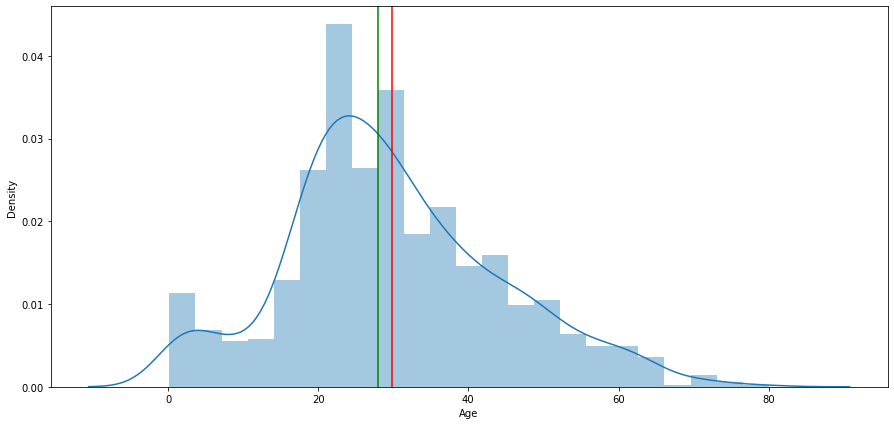

In [105]:
# Age and Fare

sns.distplot(combined.Age)
plt.axvline(combined.Age.mean(),color='red')
plt.axvline(combined.Age.median(),color='green')
#plt.axvline(combined.Age.mode(), color='blue')  # All are unique values so no Mode
plt.show()

In [106]:
combined.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [107]:
combined.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

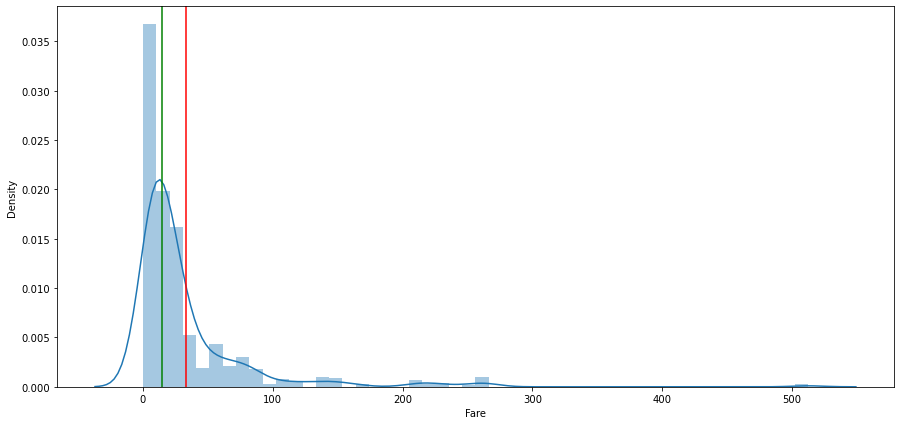

In [108]:
# Fare

sns.distplot(combined.Fare)
plt.axvline(combined.Fare.mean(),color='red')
plt.axvline(combined.Fare.median(),color='green')
#plt.axvline(combined.Fare.mode(),color='blue')   
plt.show()

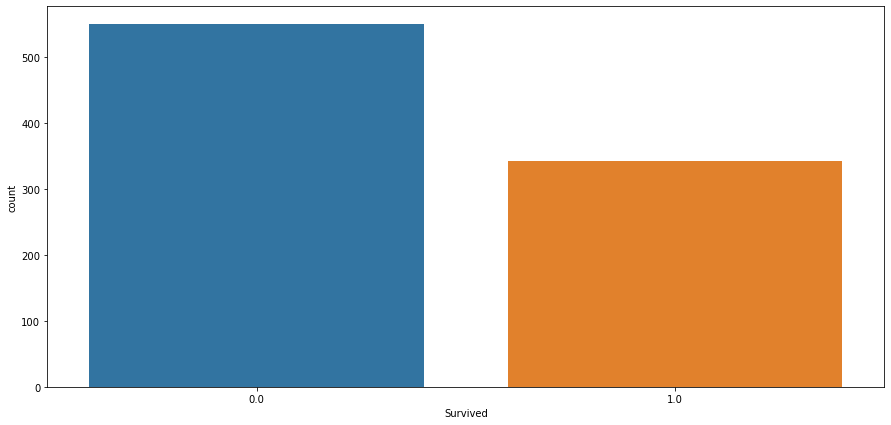

In [109]:
#Categorial variable- TGT

sns.countplot(combined.Survived)
plt.show()

#Count of People who died are more than the ones who survived

In [110]:
combined.Survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [111]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 165.2+ KB


<AxesSubplot:>

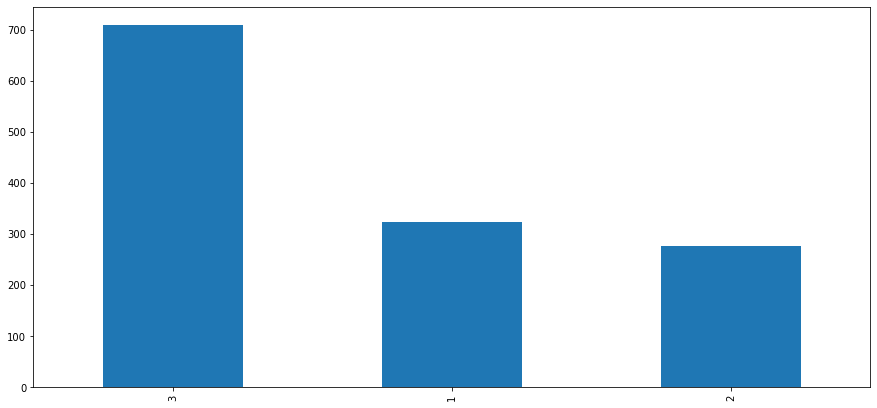

In [112]:
# Count of PClass

combined.Pclass.value_counts().plot(kind='bar')

#since we know that there were lot of passengers in Class 3
#therefore there is a high possibility that max people who died came from class 3

In [113]:
combined.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:>

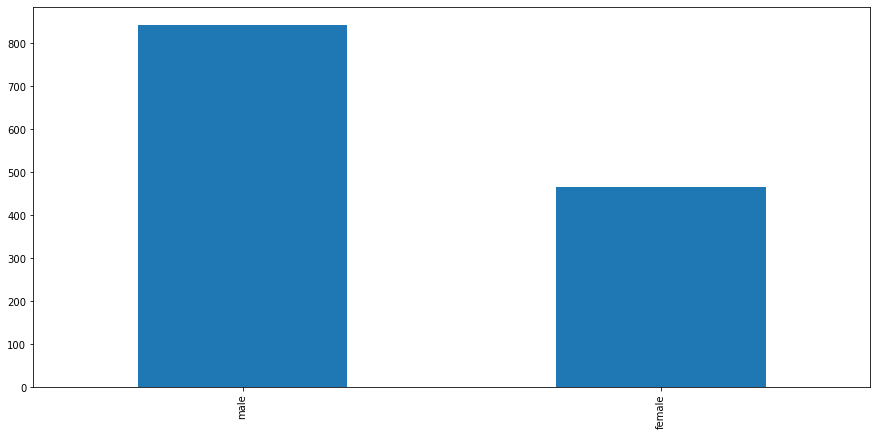

In [114]:
# Count of Gender

combined.Sex.value_counts().plot(kind='bar')

# More males on the board of titanic....

<AxesSubplot:>

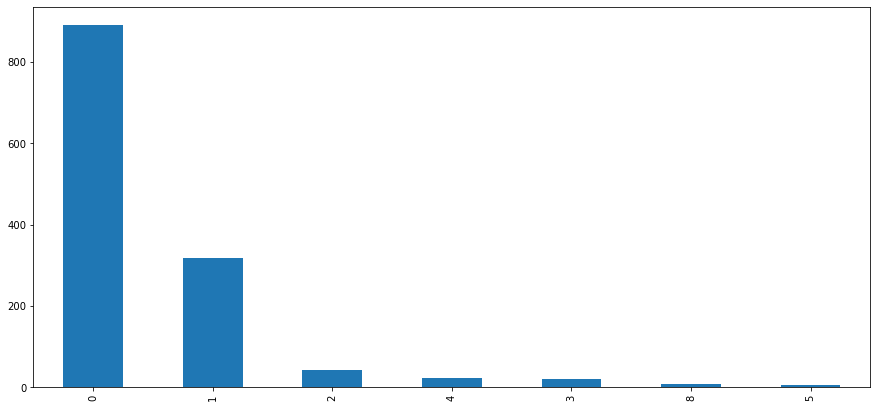

In [115]:
# Count of SipSP

combined.SibSp.value_counts().plot(kind='bar')

# 0 represents there is minimum one passenger travelling...

In [116]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

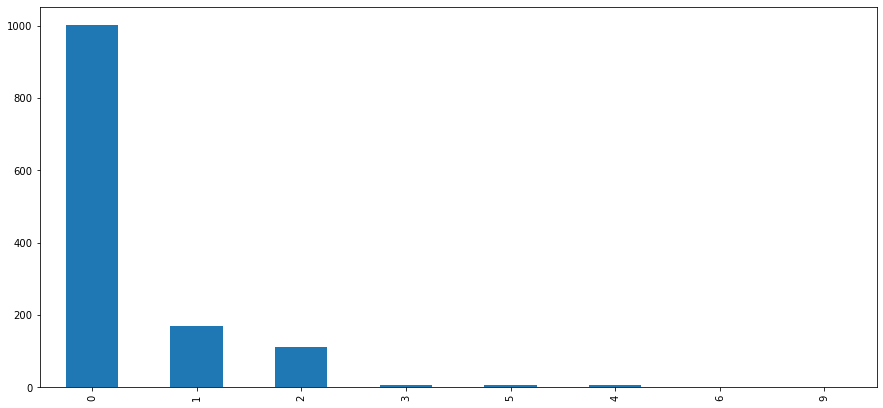

In [117]:
# Count of Parch

combined.Parch.value_counts().plot(kind='bar')

In [118]:
combined.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [119]:
combined.Ticket.value_counts()

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64

In [120]:
combined.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [121]:
# Cabin

combined.Cabin.value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: Cabin, Length: 186, dtype: int64

In [122]:
combined.Cabin.isnull().sum()

1014

In [123]:
combined.shape

(1309, 12)

<AxesSubplot:>

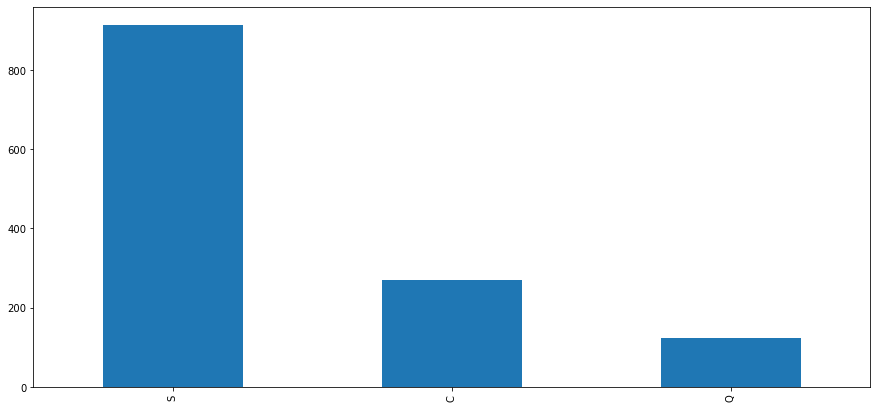

In [124]:
# Embarked
#C=Cherbourg , Q=Queenstown , S=Southampton

combined.Embarked.value_counts().plot(kind='bar')

# lot of people boarded the ship from Southampton

In [125]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 165.2+ KB


# Bivariate


In [126]:
combined.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

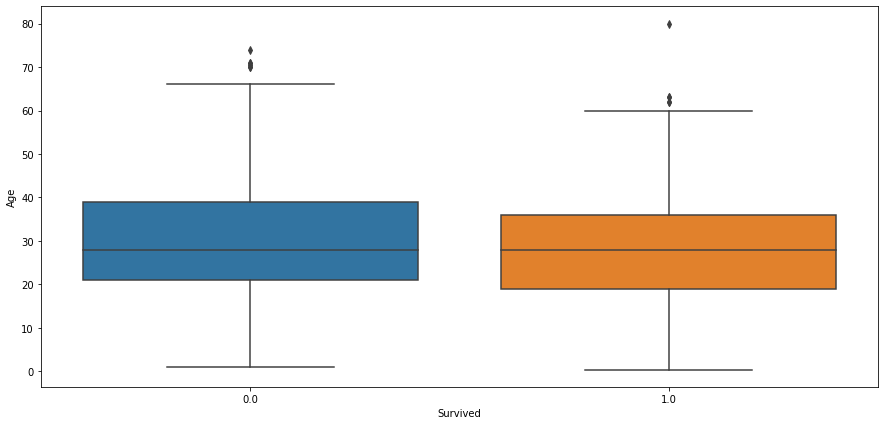

In [127]:
#Age vs Survived
sns.boxplot(x='Survived',y='Age',data=combined)
plt.show()

#People who did not survive have the higher range of Age values.
# We also notice that a passenger with the age of 80 survived.

In [128]:
# Find the Statistical Summary
combined.groupby("Survived")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0.0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1.0,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


In [129]:
# Fare vs Survived
combined.groupby("Survived")["Fare"].describe()

# The people who survived paid more fare

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0.0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1.0,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


In [130]:
# Cat vs Cat

# Survived vs PClass
tbl=pd.crosstab(combined.Pclass,combined.Survived)
tbl

Survived,0.0,1.0
Pclass,,
1,80,136
2,97,87
3,372,119


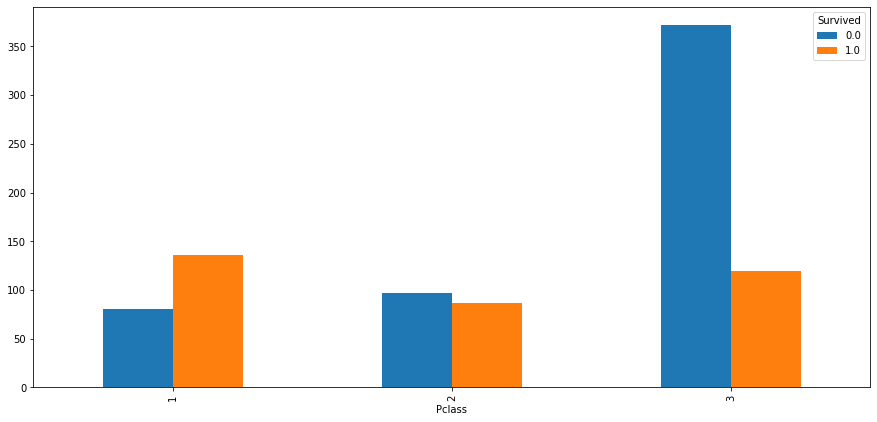

In [131]:
tbl.plot(kind='bar')
plt.show()

#Most of the people who died came from class 3

<AxesSubplot:xlabel='Sex'>

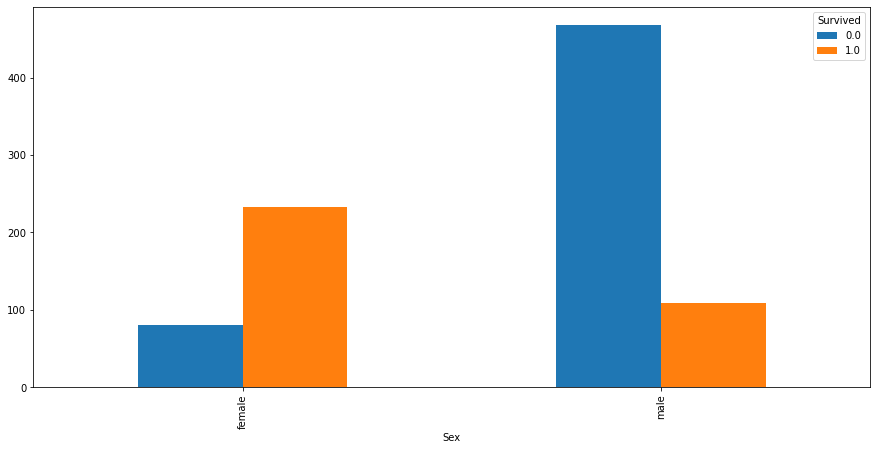

In [132]:
# Gender vs Survived

tbl=pd.crosstab(combined.Sex,combined.Survived)
tbl.plot(kind='bar')

<AxesSubplot:xlabel='Survived'>

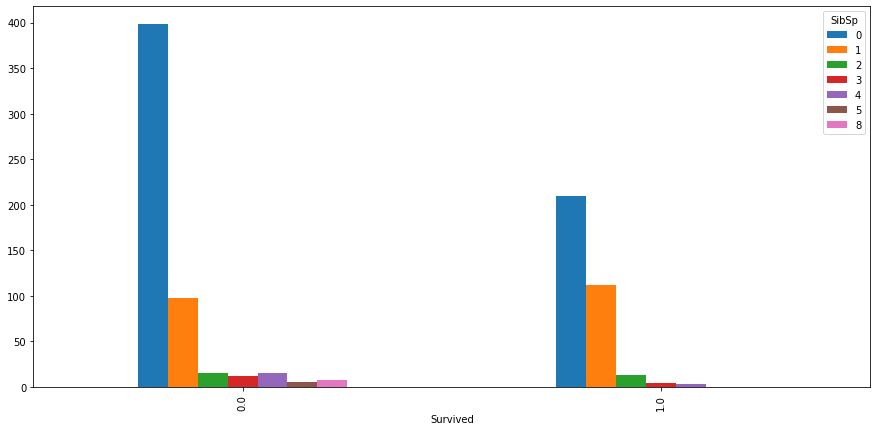

In [133]:
# Sibsp vs Survived

tbl=pd.crosstab(combined.Survived,combined.SibSp)
tbl.plot(kind='bar')



In [134]:
# Create a new feature called Family
combined["Family"]=combined.SibSp+combined.Parch+1

<AxesSubplot:xlabel='Family'>

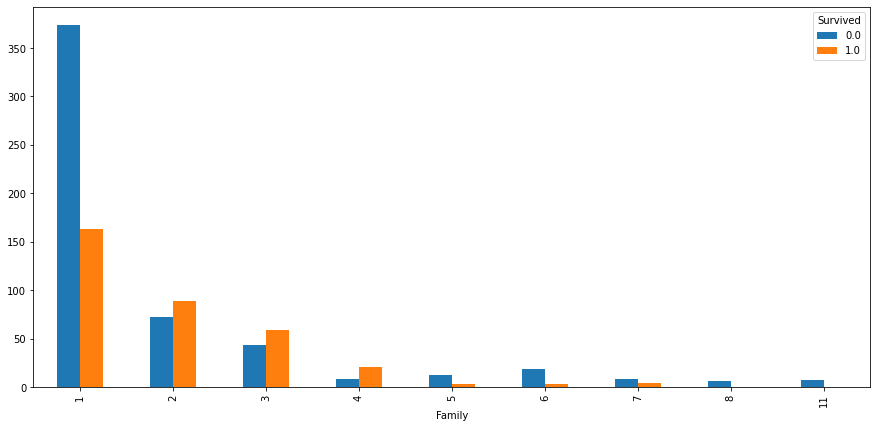

In [135]:
# Family vs Survived

tbl=pd.crosstab(combined.Family,combined.Survived)
tbl.plot(kind='bar')

# Larger families has a very low chance of survival...

<AxesSubplot:xlabel='Cabin'>

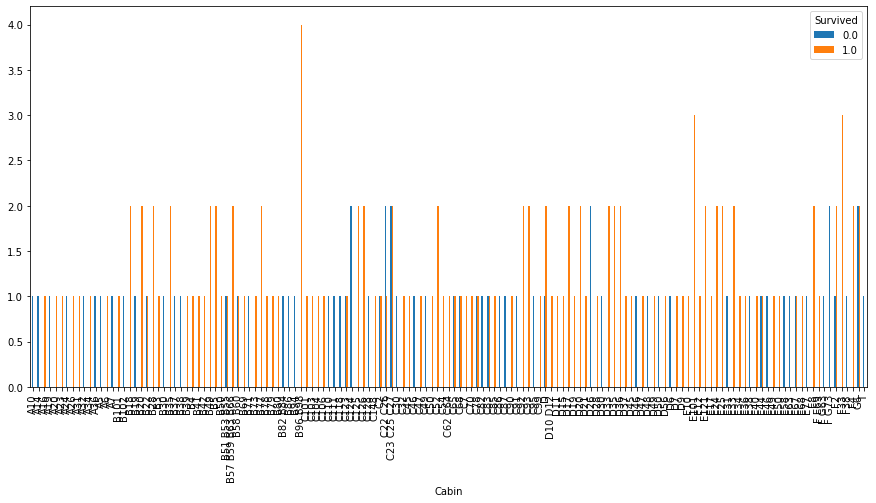

In [136]:
# Cabin vs Survived

tbl=pd.crosstab(combined.Cabin,combined.Survived)
tbl.plot(kind='bar')

<AxesSubplot:xlabel='Embarked'>

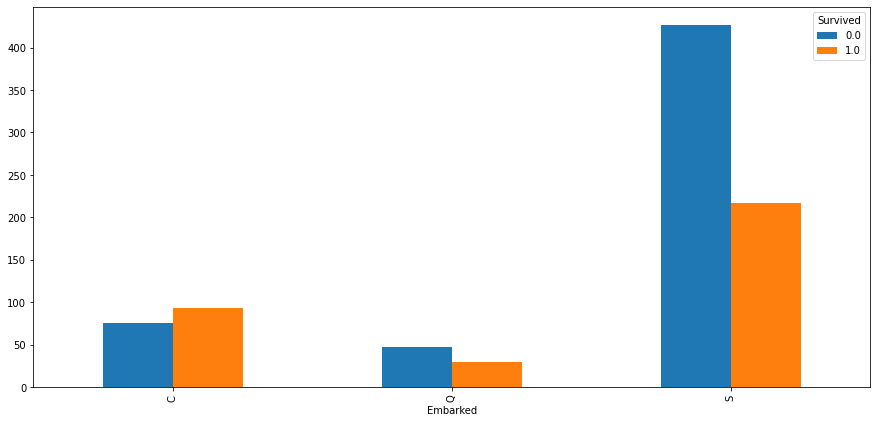

In [137]:
# Embarked vs Survived

tbl=pd.crosstab(combined.Embarked,combined.Survived)
tbl.plot(kind='bar')

### Inferences

* People from Southampton and Cherbourg have better chance of Survival.
* Passengers from Class 1 have a better survival possibility.
* The people who survived paid more than the rest.
* Most of casualities belonged to Male Passengers.
* Larger families have a lower survival ratio.
* Older people have a lesser chance of survival.

# Feature Engineering

In [138]:
# Cabin
cabins=combined.Cabin.unique()

In [139]:
cabins

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [140]:
cabins= ['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24', 'C90', 'C45', 'E8', 'B101', 'D45', 'C46', 'D30',
       'E121', 'D11', 'E77', 'F38', 'B3', 'D6', 'B82 B84', 'D17', 'A36',
       'B102', 'B69', 'E49', 'C47', 'D28', 'E17', 'A24', 'C50', 'B42',
       'C148', 'B45', 'B36', 'A21', 'D34', 'A9', 'C31', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C55 C57', 'C116', 'F', 'A29', 'C6', 'C28',
       'C51', 'C97', 'D22', 'B10', 'E45', 'E52', 'A11', 'B11', 'C80',
       'C89', 'F E46', 'B26', 'F E57', 'A18', 'E60', 'E39 E41',
       'B52 B54 B56', 'C39', 'B24', 'D40', 'D38', 'C105']

In [141]:
# Function
def cabincount(x):
    if x in cabins:
        return("Cabin_Alloted")
    else:
        return("Cabin_Missing")

In [142]:
combined["Cabin_Cat"]=combined.Cabin.apply(cabincount)

In [143]:
pd.crosstab(combined.Cabin_Cat,combined.Survived)

Survived,0.0,1.0
Cabin_Cat,,
Cabin_Alloted,68,136
Cabin_Missing,481,206


In [144]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Cabin_Cat
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Cabin_Missing
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Cabin_Alloted
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Cabin_Missing
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Cabin_Alloted
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Cabin_Missing


In [145]:
# Extracting the titles

name=combined.Name.apply(lambda x:x.split(", ")[1])
combined["titles"]=pd.Series(name.apply(lambda x:x.split(". ")[0]))

In [146]:
combined.titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [147]:
titles_ignore=[ 'Don', 'Rev', 'Dr', 'Mme',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona']

In [148]:
def titles(x):
    if x in titles_ignore:
        return("Others")
    else:
        return(x)

In [149]:
combined["titles"]=combined.titles.apply(titles)

In [150]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Cabin_Cat,titles
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Cabin_Missing,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Cabin_Alloted,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Cabin_Missing,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Cabin_Alloted,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Cabin_Missing,Mr


In [151]:
### Missing Values

combined.groupby("titles")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
titles,,,,,,,,
Master,53.0,5.482642,4.161554,0.33,2.0,4.0,9.0,14.5
Miss,210.0,21.774238,12.249077,0.17,15.0,22.0,30.0,63.0
Mr,581.0,32.252151,12.422089,11.00,23.0,29.0,39.0,80.0
Mrs,170.0,36.994118,12.901767,14.00,27.0,35.5,46.5,76.0
Ms,1.0,28.000000,NaN,28.00,28.0,28.0,28.0,28.0
Others,31.0,43.129032,12.309189,23.00,32.5,45.0,52.5,70.0


In [152]:
combined.Age.median()

28.0

In [153]:
combined.loc[(combined.titles=="Master") & (combined.Age.isnull()),"Age"]=4.0

In [154]:
combined.loc[(combined.titles=="Miss") & (combined.Age.isnull()),"Age"]=22.0

In [155]:
combined.loc[(combined.titles=="Mr") & (combined.Age.isnull()),"Age"]=29.0

In [156]:
combined.loc[(combined.titles=="Mrs") & (combined.Age.isnull()),"Age"]=35.5

In [157]:
combined.loc[(combined.titles=="Ms") & (combined.Age.isnull()),"Age"]=28.0

In [158]:
combined.loc[(combined.titles=="Others") & (combined.Age.isnull()),"Age"]=45.0

In [159]:
combined.titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others', 'Ms'], dtype=object)

In [160]:
combined.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Family            0
Cabin_Cat         0
titles            0
dtype: int64

In [161]:
# Fare and Embarked

combined.Embarked.fillna(combined.Embarked.mode()[0],inplace=True)

combined.Fare.fillna(combined.Fare.median(),inplace=True)

In [162]:
combined.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Family            0
Cabin_Cat         0
titles            0
dtype: int64

In [163]:
# Drop the unnecessary variables
combined.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family', 'Cabin_Cat',
       'titles'],
      dtype='object')

In [164]:
new=combined.drop(["PassengerId","Name","SibSp","Parch","Ticket","Cabin"],axis=1)

In [165]:
new.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Cabin_Cat,titles
0,0.0,3,male,22.0,7.2500,S,2,Cabin_Missing,Mr
1,1.0,1,female,38.0,71.2833,C,2,Cabin_Alloted,Mrs
2,1.0,3,female,26.0,7.9250,S,1,Cabin_Missing,Miss
3,1.0,1,female,35.0,53.1000,S,2,Cabin_Alloted,Mrs
4,0.0,3,male,35.0,8.0500,S,1,Cabin_Missing,Mr


In [166]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    float64
 1   Pclass     1309 non-null   int64  
 2   Sex        1309 non-null   object 
 3   Age        1309 non-null   float64
 4   Fare       1309 non-null   float64
 5   Embarked   1309 non-null   object 
 6   Family     1309 non-null   int64  
 7   Cabin_Cat  1309 non-null   object 
 8   titles     1309 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 134.6+ KB


### What is Data Leakage???

*If we scale the data before splitting, the chances are the model will be able to get a preview of the test data.

* Therefore, in order to avoid this scenario, we fit the data on train and use the train parameters(train_mean,train_std) to scale the test set.

* Is the above mentioned point a correct set of practice used by ML engineers - Yes, because we always want to tune the test set on the basis of training set


In [167]:
train.shape  #0:890

(891, 12)

In [168]:
combined.shape

(1309, 15)

In [169]:
# Splitted the data in test and train

newtrain=new.iloc[0:train.shape[0], :]

In [170]:
newtrain.tail()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Cabin_Cat,titles
886,0.0,2,male,27.0,13.00,S,1,Cabin_Missing,Others
887,1.0,1,female,19.0,30.00,S,1,Cabin_Alloted,Miss
888,0.0,3,female,22.0,23.45,S,4,Cabin_Missing,Miss
889,1.0,1,male,26.0,30.00,C,1,Cabin_Alloted,Mr
890,0.0,3,male,32.0,7.75,Q,1,Cabin_Missing,Mr


In [171]:
newtest=new.iloc[train.shape[0]:]

In [172]:
newtest.tail()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Cabin_Cat,titles
413,NaN,3,male,29.0,8.0500,S,1,Cabin_Missing,Mr
414,NaN,1,female,39.0,108.9000,C,1,Cabin_Alloted,Others
415,NaN,3,male,38.5,7.2500,S,1,Cabin_Missing,Mr
416,NaN,3,male,29.0,8.0500,S,1,Cabin_Missing,Mr
417,NaN,3,male,4.0,22.3583,C,3,Cabin_Missing,Master


In [173]:
newtrain.shape,newtest.shape

((891, 9), (418, 9))

In [174]:
# Drop the tgt from test

newtest=newtest.drop("Survived",axis=1)

In [175]:
newtest.head()

,Pclass,Sex,Age,Fare,Embarked,Family,Cabin_Cat,titles
0,3,male,34.5,7.8292,Q,1,Cabin_Missing,Mr
1,3,female,47.0,7.0000,S,2,Cabin_Missing,Mrs
2,2,male,62.0,9.6875,Q,1,Cabin_Missing,Mr
3,3,male,27.0,8.6625,S,1,Cabin_Missing,Mr
4,3,female,22.0,12.2875,S,3,Cabin_Missing,Mrs


In [176]:
newtrain.shape,newtest.shape

((891, 9), (418, 8))

# Scaling

In [177]:
sc= StandardScaler()   # fit will store the mean and std of train data  # By Scaling the Age & Fare columns ,the mean and std becomes 0,1

In [178]:
df=pd.DataFrame(sc.fit_transform(newtrain.loc[:,["Age","Fare"]]),columns=["age_scaled","fare_scaled"])

In [179]:
newtrain["Age"]=df["age_scaled"]
newtrain["Fare"]=df["fare_scaled"]
newtrain

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Cabin_Cat,titles
0,0.0,3,male,-0.552307,-0.502445,S,2,Cabin_Missing,Mr
1,1.0,1,female,0.657044,0.786845,C,2,Cabin_Alloted,Mrs
2,1.0,3,female,-0.249969,-0.488854,S,1,Cabin_Missing,Miss
3,1.0,1,female,0.430291,0.420730,S,2,Cabin_Alloted,Mrs
4,0.0,3,male,0.430291,-0.486337,S,1,Cabin_Missing,Mr
...,...,...,...,...,...,...,...,...,...
886,0.0,2,male,-0.174385,-0.386671,S,1,Cabin_Missing,Others
887,1.0,1,female,-0.779060,-0.044381,S,1,Cabin_Alloted,Miss
888,0.0,3,female,-0.552307,-0.176263,S,4,Cabin_Missing,Miss
889,1.0,1,male,-0.249969,-0.044381,C,1,Cabin_Alloted,Mr


In [180]:
# Scale the age and fare in test

testdf=pd.DataFrame(sc.transform(newtest.loc[:,["Age","Fare"]]),columns=["age_scaled","fare_scaled"])
testdf

,age_scaled,fare_scaled
0,0.392499,-0.490783
1,1.337305,-0.507479
2,2.471071,-0.453367
3,-0.174385,-0.474005
4,-0.552307,-0.401017
...,...,...
413,-0.023216,-0.486337
414,0.732629,1.544246
415,0.694837,-0.502445
416,-0.023216,-0.486337


In [181]:
newtest["Age"]=testdf["age_scaled"]
newtest["Fare"]=testdf["fare_scaled"]
newtest

,Pclass,Sex,Age,Fare,Embarked,Family,Cabin_Cat,titles
0,3,male,0.392499,-0.490783,Q,1,Cabin_Missing,Mr
1,3,female,1.337305,-0.507479,S,2,Cabin_Missing,Mrs
2,2,male,2.471071,-0.453367,Q,1,Cabin_Missing,Mr
3,3,male,-0.174385,-0.474005,S,1,Cabin_Missing,Mr
4,3,female,-0.552307,-0.401017,S,3,Cabin_Missing,Mrs
...,...,...,...,...,...,...,...,...
413,3,male,-0.023216,-0.486337,S,1,Cabin_Missing,Mr
414,1,female,0.732629,1.544246,C,1,Cabin_Alloted,Others
415,3,male,0.694837,-0.502445,S,1,Cabin_Missing,Mr
416,3,male,-0.023216,-0.486337,S,1,Cabin_Missing,Mr


In [182]:
newtest.head()

,Pclass,Sex,Age,Fare,Embarked,Family,Cabin_Cat,titles
0,3,male,0.392499,-0.490783,Q,1,Cabin_Missing,Mr
1,3,female,1.337305,-0.507479,S,2,Cabin_Missing,Mrs
2,2,male,2.471071,-0.453367,Q,1,Cabin_Missing,Mr
3,3,male,-0.174385,-0.474005,S,1,Cabin_Missing,Mr
4,3,female,-0.552307,-0.401017,S,3,Cabin_Missing,Mrs


In [183]:
# One Hot Encoder - one hot encoder as an algorithm transformed not just categories it also transforms number into 0 or 1

from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder()

transformed=ohe.fit_transform(newtrain)
pd.DataFrame(transformed.toarray())

,0,1,2,3,4,5,6,7,8,9,...,354,355,356,357,358,359,360,361,362,363
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
887,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
888,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
889,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [184]:
# Dummy Train & Dummytest

dummytrain=pd.get_dummies(newtrain,drop_first=True)
dummytest=pd.get_dummies(newtest,drop_first=True)

In [185]:
dummytrain.shape,dummytest.shape

((891, 14), (418, 13))

In [189]:
dummytrain.head()

,Survived,Pclass,Age,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Cabin_Cat_Cabin_Missing,titles_Miss,titles_Mr,titles_Mrs,titles_Ms,titles_Others
0,0,3,-0.552307,-0.502445,2,1,0,1,1,0,1,0,0,0
1,1,1,0.657044,0.786845,2,0,0,0,0,0,0,1,0,0
2,1,3,-0.249969,-0.488854,1,0,0,1,1,1,0,0,0,0
3,1,1,0.430291,0.420730,2,0,0,1,0,0,0,1,0,0
4,0,3,0.430291,-0.486337,1,1,0,1,1,0,1,0,0,0


In [187]:
dummytrain['Survived']=dummytrain['Survived'].astype('int')

In [188]:
dummytest.head()

,Pclass,Age,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Cabin_Cat_Cabin_Missing,titles_Miss,titles_Mr,titles_Mrs,titles_Ms,titles_Others
0,3,0.392499,-0.490783,1,1,1,0,1,0,1,0,0,0
1,3,1.337305,-0.507479,2,0,0,1,1,0,0,1,0,0
2,2,2.471071,-0.453367,1,1,1,0,1,0,1,0,0,0
3,3,-0.174385,-0.474005,1,1,0,1,1,0,1,0,0,0
4,3,-0.552307,-0.401017,3,0,0,1,1,0,0,1,0,0


## Model Building

## Model 1

In [190]:
x=dummytrain.drop('Survived',axis=1)
y=dummytrain['Survived']

In [150]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [152]:
X=sm.add_constant(x)
X.head()

,const,Pclass,Age,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Cabin_Cat_Cabin_Missing,titles_Miss,titles_Mr,titles_Mrs,titles_Ms,titles_Others
0,1.0,3,-0.552307,-0.502445,2,1,0,1,1,0,1,0,0,0
1,1.0,1,0.657044,0.786845,2,0,0,0,0,0,0,1,0,0
2,1.0,3,-0.249969,-0.488854,1,0,0,1,1,1,0,0,0,0
3,1.0,1,0.430291,0.420730,2,0,0,1,0,0,0,1,0,0
4,1.0,3,0.430291,-0.486337,1,1,0,1,1,0,1,0,0,0


In [153]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)

In [154]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((712, 14), (179, 14), (712,), (179,))

In [155]:
model=sm.Logit(y_train,x_train).fit()

         Current function value: 0.416119
         Iterations: 35


C:\Users\Piyush mishra\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [156]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      698
Method:                           MLE   Df Model:                           13
Date:                Thu, 01 Sep 2022   Pseudo R-squ.:                  0.3791
Time:                        21:55:49   Log-Likelihood:                -296.28
converged:                      False   LL-Null:                       -477.17
Covariance Type:            nonrobust   LLR p-value:                 2.562e-69
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      22.7413   2309.371      0.010      0.992   -4503.544    4549.026
Pclass                     -0.8747      0.199     -4.404      0.000      -1.264      -0.485


In [157]:
y_pred_prob=model.predict(x_test)

In [158]:
y_pred_prob

590    0.073643
131    0.104392
628    0.091071
195    0.953165
230    0.960607
         ...   
456    0.277260
191    0.225142
603    0.059541
94     0.041316
766    0.375673
Length: 179, dtype: float64

In [159]:
y_pred=[0 if x<0.5 else 1 for x in y_pred_prob]

In [161]:
y_pred[:5]

[0, 0, 0, 1, 1]

In [162]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report,f1_score

In [188]:
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print('Accuracy:\t',accuracy_score(y_test,y_pred))
print('Precison:\t',precision_score(y_test,y_pred))
print('Recall:\t',recall_score(y_test,y_pred))
print('F1 Score:\t',f1_score(y_test,y_pred))

Confusion Matrix
 [[104  13]
 [ 12  50]]
Accuracy:	 0.8603351955307262
Precison:	 0.7936507936507936
Recall:	 0.8064516129032258
F1 Score:	 0.7999999999999999


In [189]:
print('Classification Report:\t\n',classification_report(y_test,y_pred))

Classification Report:	
               precision    recall  f1-score   support

         0.0       0.90      0.89      0.89       117
         1.0       0.79      0.81      0.80        62

    accuracy                           0.86       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.86      0.86      0.86       179



In [191]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(random_state=140)

In [195]:
pred_lg=lg.fit(x,y).predict(dummytest)

In [196]:
submission=pd.DataFrame({'PassengerId':test.PassengerId,
                        'Survived':pred_lg})

submission.to_csv("lg.csv",index=False)    ## 0.77511

## Model 2

In [200]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)

In [197]:
from sklearn.tree import DecisionTreeClassifier

In [202]:
dt=DecisionTreeClassifier()
model_tree=dt.fit(x_train,y_train)

In [203]:
y_pred_tree=model_tree.predict(x_test)

In [204]:
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred_tree))
print('Accuracy:\t',accuracy_score(y_test,y_pred_tree))
print('Precison:\t',precision_score(y_test,y_pred_tree))
print('Recall:\t',recall_score(y_test,y_pred_tree))
print('F1 Score:\t',f1_score(y_test,y_pred_tree))

Confusion Matrix
 [[92 25]
 [13 49]]
Accuracy:	 0.7877094972067039
Precison:	 0.6621621621621622
Recall:	 0.7903225806451613
F1 Score:	 0.7205882352941176


In [205]:
print('Classification Report:\t\n',classification_report(y_test,y_pred_tree))

Classification Report:	
               precision    recall  f1-score   support

         0.0       0.88      0.79      0.83       117
         1.0       0.66      0.79      0.72        62

    accuracy                           0.79       179
   macro avg       0.77      0.79      0.77       179
weighted avg       0.80      0.79      0.79       179



In [198]:
dt=DecisionTreeClassifier(random_state=494)

In [199]:
pred_dtree=dt.fit(x,y).predict(dummytest)

In [200]:
submission=pd.DataFrame({'PassengerId':test.PassengerId,
                        'Survived':pred_dtree})

submission.to_csv("dt.csv",index=False)   ##0.74401

## Model 3

In [204]:
from sklearn.ensemble import RandomForestClassifier

In [207]:
rf=RandomForestClassifier()
model_rf=rf.fit(x_train,y_train)

In [209]:
y_pred_rf=model_rf.predict(x_test)

In [210]:
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred_rf))
print('Accuracy:\t',accuracy_score(y_test,y_pred_rf))
print('Precison:\t',precision_score(y_test,y_pred_rf))
print('Recall:\t',recall_score(y_test,y_pred_rf))
print('F1 Score:\t',f1_score(y_test,y_pred_rf))

Confusion Matrix
 [[103  14]
 [ 10  52]]
Accuracy:	 0.8659217877094972
Precison:	 0.7878787878787878
Recall:	 0.8387096774193549
F1 Score:	 0.8125


In [211]:
print('Classification Report:\t\n',classification_report(y_test,y_pred_rf))

Classification Report:	
               precision    recall  f1-score   support

         0.0       0.91      0.88      0.90       117
         1.0       0.79      0.84      0.81        62

    accuracy                           0.87       179
   macro avg       0.85      0.86      0.85       179
weighted avg       0.87      0.87      0.87       179



In [205]:
rf=RandomForestClassifier(random_state=598,criterion="entropy")

In [207]:
pred_rf=rf.fit(x,y).predict(dummytest)

In [209]:
submission=pd.DataFrame({'PassengerId':test.PassengerId,
                        'Survived':pred_rf})

submission.to_csv("rf.csv",index=False)    ## 0.74880

## Model 4

In [210]:
from sklearn.ensemble import GradientBoostingClassifier

In [213]:
gbm=GradientBoostingClassifier()
model_gbm=gbm.fit(x_train,y_train)

In [214]:
y_pred_gbm=model_gbm.predict(x_test)

In [215]:
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred_gbm))
print('Accuracy:\t',accuracy_score(y_test,y_pred_gbm))
print('Precison:\t',precision_score(y_test,y_pred_gbm))
print('Recall:\t',recall_score(y_test,y_pred_gbm))
print('F1 Score:\t',f1_score(y_test,y_pred_gbm))

Confusion Matrix
 [[105  12]
 [ 12  50]]
Accuracy:	 0.8659217877094972
Precison:	 0.8064516129032258
Recall:	 0.8064516129032258
F1 Score:	 0.8064516129032258


In [216]:
print('Classification Report:\t\n',classification_report(y_test,y_pred_gbm))

Classification Report:	
               precision    recall  f1-score   support

         0.0       0.90      0.90      0.90       117
         1.0       0.81      0.81      0.81        62

    accuracy                           0.87       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.87      0.87      0.87       179



In [211]:
gbm=GradientBoostingClassifier(random_state=150)

In [212]:
pred_gbm=gbm.fit(x,y).predict(dummytest)

In [213]:
submission=pd.DataFrame({'PassengerId':test.PassengerId,
                        'Survived':pred_gbm})

submission.to_csv("gbm.csv",index=False)   ## 0.76794

## Model 5

In [214]:
from xgboost import XGBClassifier

In [218]:
xgb=XGBClassifier()
model_xgb=xgb.fit(x_train,y_train)

In [219]:
y_pred_xgb=model_xgb.predict(x_test)

In [220]:
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred_xgb))
print('Accuracy:\t',accuracy_score(y_test,y_pred_xgb))
print('Precison:\t',precision_score(y_test,y_pred_xgb))
print('Recall:\t',recall_score(y_test,y_pred_xgb))
print('F1 Score:\t',f1_score(y_test,y_pred_xgb))

Confusion Matrix
 [[105  12]
 [ 15  47]]
Accuracy:	 0.8491620111731844
Precison:	 0.7966101694915254
Recall:	 0.7580645161290323
F1 Score:	 0.7768595041322315


In [221]:
print('Classification Report:\t\n',classification_report(y_test,y_pred_xgb))

Classification Report:	
               precision    recall  f1-score   support

         0.0       0.88      0.90      0.89       117
         1.0       0.80      0.76      0.78        62

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.85      0.85      0.85       179



In [215]:
xgb=XGBClassifier(random_state=138)

In [216]:
pred_xgb=xgb.fit(x,y).predict(dummytest)

In [217]:
submission=pd.DataFrame({'PassengerId':test.PassengerId,
                        'Survived':pred_xgb})

submission.to_csv("xgb.csv",index=False) ## 0.75119

## Model 6

In [218]:
from lightgbm import LGBMClassifier

In [224]:
lgb=LGBMClassifier()
model_lgb=lgb.fit(x_train,y_train)

In [225]:
y_pred_lgb=model_lgb.predict(x_test)

In [226]:
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred_lgb))
print('Accuracy:\t',accuracy_score(y_test,y_pred_lgb))
print('Precison:\t',precision_score(y_test,y_pred_lgb))
print('Recall:\t',recall_score(y_test,y_pred_lgb))
print('F1 Score:\t',f1_score(y_test,y_pred_lgb))

Confusion Matrix
 [[103  14]
 [ 13  49]]
Accuracy:	 0.8491620111731844
Precison:	 0.7777777777777778
Recall:	 0.7903225806451613
F1 Score:	 0.7839999999999999


In [227]:
print('Classification Report:\t\n',classification_report(y_test,y_pred_lgb))

Classification Report:	
               precision    recall  f1-score   support

         0.0       0.89      0.88      0.88       117
         1.0       0.78      0.79      0.78        62

    accuracy                           0.85       179
   macro avg       0.83      0.84      0.83       179
weighted avg       0.85      0.85      0.85       179



In [219]:
lgbm=LGBMClassifier(random_state=438)

In [220]:
pred_lgbm=lgbm.fit(x,y).predict(dummytest)

In [221]:
submission=pd.DataFrame({'PassengerId':test.PassengerId,
                        'Survived':pred_lgbm})

submission.to_csv("lgbm.csv",index=False)   ##  0.74641

In [222]:
from catboost import CatBoostClassifier
cboost=CatBoostClassifier(random_state=660)

## Voting Classifier

In [224]:
# Lets Build a Voting Classifier Model
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=[('lg',lg),('rf',rf),
                               ('gbm',gbm),('xgb',xgb),
                               ('cb',cboost)],voting="hard")

In [226]:
pred_voting=vc.fit(x,y).predict(dummytest)

Learning rate set to 0.009807
0:	learn: 0.6874359	total: 158ms	remaining: 2m 38s
1:	learn: 0.6803152	total: 162ms	remaining: 1m 20s
2:	learn: 0.6734642	total: 165ms	remaining: 54.8s
3:	learn: 0.6667414	total: 168ms	remaining: 41.9s
4:	learn: 0.6605880	total: 172ms	remaining: 34.1s
5:	learn: 0.6546918	total: 174ms	remaining: 28.8s
6:	learn: 0.6488464	total: 177ms	remaining: 25.2s
7:	learn: 0.6435219	total: 182ms	remaining: 22.6s
8:	learn: 0.6375639	total: 186ms	remaining: 20.5s
9:	learn: 0.6326957	total: 188ms	remaining: 18.6s
10:	learn: 0.6268244	total: 192ms	remaining: 17.2s
11:	learn: 0.6215141	total: 195ms	remaining: 16.1s
12:	learn: 0.6170216	total: 198ms	remaining: 15.1s
13:	learn: 0.6119715	total: 202ms	remaining: 14.2s
14:	learn: 0.6071827	total: 205ms	remaining: 13.5s
15:	learn: 0.6023389	total: 209ms	remaining: 12.8s
16:	learn: 0.5976790	total: 212ms	remaining: 12.3s
17:	learn: 0.5935199	total: 215ms	remaining: 11.7s
18:	learn: 0.5892912	total: 218ms	remaining: 11.3s
19:	learn

174:	learn: 0.3770058	total: 705ms	remaining: 3.32s
175:	learn: 0.3766304	total: 708ms	remaining: 3.31s
176:	learn: 0.3761840	total: 711ms	remaining: 3.31s
177:	learn: 0.3761508	total: 712ms	remaining: 3.29s
178:	learn: 0.3757913	total: 715ms	remaining: 3.28s
179:	learn: 0.3754347	total: 718ms	remaining: 3.27s
180:	learn: 0.3751494	total: 722ms	remaining: 3.27s
181:	learn: 0.3748952	total: 725ms	remaining: 3.26s
182:	learn: 0.3746313	total: 730ms	remaining: 3.26s
183:	learn: 0.3741731	total: 733ms	remaining: 3.25s
184:	learn: 0.3738863	total: 736ms	remaining: 3.24s
185:	learn: 0.3734807	total: 739ms	remaining: 3.23s
186:	learn: 0.3732831	total: 742ms	remaining: 3.23s
187:	learn: 0.3728055	total: 745ms	remaining: 3.22s
188:	learn: 0.3724070	total: 748ms	remaining: 3.21s
189:	learn: 0.3721144	total: 750ms	remaining: 3.2s
190:	learn: 0.3716923	total: 752ms	remaining: 3.19s
191:	learn: 0.3714604	total: 754ms	remaining: 3.17s
192:	learn: 0.3710357	total: 756ms	remaining: 3.16s
193:	learn: 0

379:	learn: 0.3352875	total: 1.04s	remaining: 1.7s
380:	learn: 0.3352125	total: 1.05s	remaining: 1.7s
381:	learn: 0.3351197	total: 1.05s	remaining: 1.7s
382:	learn: 0.3349553	total: 1.05s	remaining: 1.69s
383:	learn: 0.3348176	total: 1.05s	remaining: 1.69s
384:	learn: 0.3347095	total: 1.05s	remaining: 1.68s
385:	learn: 0.3345494	total: 1.06s	remaining: 1.68s
386:	learn: 0.3344431	total: 1.06s	remaining: 1.68s
387:	learn: 0.3343728	total: 1.06s	remaining: 1.67s
388:	learn: 0.3342715	total: 1.06s	remaining: 1.67s
389:	learn: 0.3341310	total: 1.06s	remaining: 1.66s
390:	learn: 0.3341044	total: 1.07s	remaining: 1.66s
391:	learn: 0.3339637	total: 1.08s	remaining: 1.68s
392:	learn: 0.3338615	total: 1.08s	remaining: 1.67s
393:	learn: 0.3336989	total: 1.08s	remaining: 1.67s
394:	learn: 0.3335094	total: 1.09s	remaining: 1.67s
395:	learn: 0.3333295	total: 1.09s	remaining: 1.66s
396:	learn: 0.3331099	total: 1.09s	remaining: 1.66s
397:	learn: 0.3328493	total: 1.09s	remaining: 1.65s
398:	learn: 0.3

541:	learn: 0.3157073	total: 1.4s	remaining: 1.19s
542:	learn: 0.3155277	total: 1.41s	remaining: 1.18s
543:	learn: 0.3154104	total: 1.41s	remaining: 1.18s
544:	learn: 0.3152663	total: 1.41s	remaining: 1.18s
545:	learn: 0.3150363	total: 1.41s	remaining: 1.17s
546:	learn: 0.3148963	total: 1.41s	remaining: 1.17s
547:	learn: 0.3147880	total: 1.41s	remaining: 1.17s
548:	learn: 0.3146322	total: 1.42s	remaining: 1.16s
549:	learn: 0.3145676	total: 1.42s	remaining: 1.16s
550:	learn: 0.3144313	total: 1.42s	remaining: 1.16s
551:	learn: 0.3143079	total: 1.42s	remaining: 1.15s
552:	learn: 0.3142418	total: 1.42s	remaining: 1.15s
553:	learn: 0.3141219	total: 1.42s	remaining: 1.15s
554:	learn: 0.3140303	total: 1.43s	remaining: 1.14s
555:	learn: 0.3138267	total: 1.43s	remaining: 1.14s
556:	learn: 0.3137102	total: 1.43s	remaining: 1.14s
557:	learn: 0.3136548	total: 1.43s	remaining: 1.13s
558:	learn: 0.3135674	total: 1.43s	remaining: 1.13s
559:	learn: 0.3135331	total: 1.43s	remaining: 1.13s
560:	learn: 0

703:	learn: 0.2997118	total: 1.76s	remaining: 739ms
704:	learn: 0.2996184	total: 1.76s	remaining: 737ms
705:	learn: 0.2995635	total: 1.76s	remaining: 735ms
706:	learn: 0.2994820	total: 1.77s	remaining: 732ms
707:	learn: 0.2993924	total: 1.77s	remaining: 730ms
708:	learn: 0.2993032	total: 1.77s	remaining: 728ms
709:	learn: 0.2991654	total: 1.78s	remaining: 726ms
710:	learn: 0.2990146	total: 1.78s	remaining: 724ms
711:	learn: 0.2988329	total: 1.78s	remaining: 721ms
712:	learn: 0.2987380	total: 1.79s	remaining: 719ms
713:	learn: 0.2986419	total: 1.79s	remaining: 717ms
714:	learn: 0.2985525	total: 1.79s	remaining: 715ms
715:	learn: 0.2983953	total: 1.8s	remaining: 713ms
716:	learn: 0.2980353	total: 1.8s	remaining: 711ms
717:	learn: 0.2979648	total: 1.8s	remaining: 709ms
718:	learn: 0.2978895	total: 1.81s	remaining: 707ms
719:	learn: 0.2977082	total: 1.81s	remaining: 704ms
720:	learn: 0.2976432	total: 1.81s	remaining: 702ms
721:	learn: 0.2975523	total: 1.82s	remaining: 701ms
722:	learn: 0.2

879:	learn: 0.2817945	total: 2.28s	remaining: 311ms
880:	learn: 0.2817185	total: 2.28s	remaining: 308ms
881:	learn: 0.2816398	total: 2.28s	remaining: 305ms
882:	learn: 0.2815249	total: 2.29s	remaining: 303ms
883:	learn: 0.2814691	total: 2.29s	remaining: 300ms
884:	learn: 0.2814346	total: 2.29s	remaining: 298ms
885:	learn: 0.2813740	total: 2.29s	remaining: 295ms
886:	learn: 0.2810559	total: 2.29s	remaining: 292ms
887:	learn: 0.2809350	total: 2.3s	remaining: 290ms
888:	learn: 0.2808788	total: 2.3s	remaining: 287ms
889:	learn: 0.2808170	total: 2.3s	remaining: 284ms
890:	learn: 0.2806687	total: 2.3s	remaining: 282ms
891:	learn: 0.2806042	total: 2.31s	remaining: 279ms
892:	learn: 0.2805402	total: 2.31s	remaining: 277ms
893:	learn: 0.2804689	total: 2.31s	remaining: 274ms
894:	learn: 0.2803232	total: 2.31s	remaining: 271ms
895:	learn: 0.2802426	total: 2.31s	remaining: 268ms
896:	learn: 0.2801474	total: 2.31s	remaining: 266ms
897:	learn: 0.2799970	total: 2.32s	remaining: 263ms
898:	learn: 0.27

In [227]:
submission=pd.DataFrame({'PassengerId':test.PassengerId,
                        'Survived':pred_voting})

submission.to_csv("vc.csv",index=False)   ## 0.76555

## Stacking Classifier

In [228]:
# Stacking Classifier

from sklearn.ensemble import StackingClassifier

level0=[("xgb",xgb),("gbm",gbm),("lgbm",lgbm)]
level1=lg

stack=StackingClassifier(estimators=level0,final_estimator=level1,
                        cv=5)

In [229]:
pred_stack=stack.fit(x,y).predict(dummytest)

In [230]:
submission=pd.DataFrame({'PassengerId':test.PassengerId,
                        'Survived':pred_stack})

submission.to_csv("stack.csv",index=False) ### 0.76794